In [1]:
import pandas as pd 

import numpy as np 

import sklearn 

pd.options.display.float_format = "{:.5f}".format

pd.set_option('display.max_columns', 500)

from  sklearn.model_selection  import train_test_split

from sklearn.feature_selection import RFE , SelectKBest 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import f_oneway

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE

from imblearn.under_sampling import RandomUnderSampler

from sklearn import metrics
 

In [2]:
## Importing data : (already made the change of variable name by changing in actuval CSV file of each attack, as it has space
## removed the space from the actuval file)


normal = pd.read_csv(r"C:\Users\ACER\Downloads\ML assingment\12. Capstone Case Study - Cyber Security Case Study\Datasets\Data_of_Attack_Back_Normal.csv")
back = pd.read_csv(r"C:\Users\ACER\Downloads\ML assingment\12. Capstone Case Study - Cyber Security Case Study\Datasets\Data_of_Attack_Back.csv")
buffer_overflow = pd.read_csv(r"C:\Users\ACER\Downloads\ML assingment\12. Capstone Case Study - Cyber Security Case Study\Datasets\Data_of_Attack_Back_BufferOverflow.csv")
ftp_write = pd.read_csv(r"C:\Users\ACER\Downloads\ML assingment\12. Capstone Case Study - Cyber Security Case Study\Datasets\Data_of_Attack_Back_FTPWrite.csv")
guess_password = pd.read_csv(r"C:\Users\ACER\Downloads\ML assingment\12. Capstone Case Study - Cyber Security Case Study\Datasets\Data_of_Attack_Back_GuessPassword.csv")
neptune = pd.read_csv(r"C:\Users\ACER\Downloads\ML assingment\12. Capstone Case Study - Cyber Security Case Study\Datasets\Data_of_Attack_Back_Neptune.csv")
n_map = pd.read_csv(r"C:\Users\ACER\Downloads\ML assingment\12. Capstone Case Study - Cyber Security Case Study\Datasets\Data_of_Attack_Back_NMap.csv")
port_sweep = pd.read_csv(r"C:\Users\ACER\Downloads\ML assingment\12. Capstone Case Study - Cyber Security Case Study\Datasets\Data_of_Attack_Back_PortSweep.csv")
root_kit = pd.read_csv(r"C:\Users\ACER\Downloads\ML assingment\12. Capstone Case Study - Cyber Security Case Study\Datasets\Data_of_Attack_Back_RootKit.csv")
satan = pd.read_csv(r"C:\Users\ACER\Downloads\ML assingment\12. Capstone Case Study - Cyber Security Case Study\Datasets\Data_of_Attack_Back_Satan.csv")
smurf = pd.read_csv(r"C:\Users\ACER\Downloads\ML assingment\12. Capstone Case Study - Cyber Security Case Study\Datasets\Data_of_Attack_Back_Smurf.csv")


## 1) Binominal Classification : 

In [3]:
# Make an column as attack as target variable for binominal Classification and in attack variable if its 0 its normal and 
# if its 1 its an  attack  : 

normal["attack"] = 0

back["attack"] = 1
buffer_overflow["attack"] = 1
smurf["attack"] = 1
guess_password["attack"] = 1
ftp_write["attack"] = 1
satan["attack"] = 1
root_kit["attack"] = 1
port_sweep["attack"] = 1
n_map["attack"] = 1
neptune["attack"] = 1

In [4]:
data = pd.concat([normal, back,buffer_overflow,smurf,guess_password,ftp_write,satan,root_kit,port_sweep,n_map,neptune],axis=0, join='inner')

In [5]:
## For Multinominal classification : 
### Make an column as attack as target variable for binominal Classification and in attack variable if its 0 its normal, if its  
##  1 its back , 2 its buffer-overflow , 3  its smurf , 4 its guess-password , 5 its ftp-write, 6 its satan, 7 its root-kit 
##  8 its poort-sweep , 9 its n-map and 10 its neptune attack. 

back["attack"] = 1
buffer_overflow["attack"] = 2
smurf["attack"] = 3
guess_password["attack"] = 4
ftp_write["attack"] = 5
satan["attack"] = 6
root_kit["attack"] = 7
port_sweep["attack"] = 8
n_map["attack"] = 9
neptune["attack"] = 10

In [6]:
## concat all the data as one :
data_multi = pd.concat([normal, back,buffer_overflow,smurf,guess_password,ftp_write,satan,root_kit,port_sweep,n_map,neptune],axis=0, join='inner')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817551 entries, 0 to 227227
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817551 non-null  float64
 1   protocol_type                817551 non-null  float64
 2   service                      817551 non-null  float64
 3   flag                         817551 non-null  float64
 4   src_bytes                    817551 non-null  float64
 5   dst_bytes                    817551 non-null  float64
 6   land                         817551 non-null  int64  
 7   wrong_fragment               817551 non-null  float64
 8   urgent                       817551 non-null  float64
 9   hot                          817551 non-null  float64
 10  num_failed_logins            817551 non-null  float64
 11  logged_in                    817551 non-null  float64
 12  num_compromised              817551 non-null  float64
 13 

In [8]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_error_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
0,0.00000,0.00000,0.00000,0.00000,0.00215,0.45076,0,0.00000,0.00000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00100,0.00100,0.00000,0.00000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0
1,0.00000,0.00000,0.00000,0.00000,0.00162,0.04528,0,0.00000,0.00000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00200,0.00200,0.00000,0.00000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00100,0.00100,0.10000,0.00000,0.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0
2,0.00000,0.00000,0.00000,0.00000,0.00236,0.01228,0,0.00000,0.00000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00100,0.00100,0.00000,0.00000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00200,0.00200,0.10000,0.00000,0.05000,0.00000,0.00000,0.00000,0.00000,0.00000,0
3,0.00000,0.00000,0.00000,0.00000,0.00233,0.02032,0,0.00000,0.00000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00200,0.00200,0.00000,0.00000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00300,0.00300,0.10000,0.00000,0.03300,0.00000,0.00000,0.00000,0.00000,0.00000,0
4,0.00000,0.00000,0.00000,0.00000,0.00239,0.00486,0,0.00000,0.00000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.00300,0.00300,0.00000,0.00000,0.00000,0.00000,0.10000,0.00000,0.00000,0.00400,0.00400,0.10000,0.00000,0.02500,0.00000,0.00000,0.00000,0.00000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227223,0.00000,0.00000,0.12000,0.05000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.11700,0.00200,0.00000,0.00000,0.10000,0.10000,0.00200,0.00600,0.00000,0.25500,0.00200,0.00100,0.00800,0.00000,0.00000,0.00000,0.00000,0.10000,0.10000,1
227224,0.00000,0.00000,0.12000,0.05000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.11900,0.00400,0.00000,0.00000,0.10000,0.10000,0.00300,0.00600,0.00000,0.25500,0.00400,0.00200,0.00800,0.00000,0.00000,0.00000,0.00000,0.10000,0.10000,1
227225,0.00000,0.00000,0.12000,0.05000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.12000,0.00500,0.00000,0.00000,0.10000,0.10000,0.00400,0.00600,0.00000,0.25500,0.00500,0.00200,0.00900,0.00000,0.00000,0.00000,0.00000,0.10000,0.10000,1
227226,0.00000,0.00000,0.12000,0.05000,0.00000,0.00000,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0.00000,0.00000,0.13000,0.00400,0.00000,0.00000,0.10000,0.10000,0.00300,0.00600,0.00000,0.25500,0.00400,0.00200,0.00800,0.00000,0.00000,0.00000,0.00000,0.10000,0.10000,1


In [9]:
## Doing basic checks : 

## 1) columns name 


data.rename({"count":"counts"},axis=1, inplace=True)

data_multi.rename({"count":"counts"},axis=1, inplace=True)

In [10]:
## 2) Basic data observation through info():
data.info()


## Things to observe from info , no missing and all variables are numerical 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817551 entries, 0 to 227227
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     817551 non-null  float64
 1   protocol_type                817551 non-null  float64
 2   service                      817551 non-null  float64
 3   flag                         817551 non-null  float64
 4   src_bytes                    817551 non-null  float64
 5   dst_bytes                    817551 non-null  float64
 6   land                         817551 non-null  int64  
 7   wrong_fragment               817551 non-null  float64
 8   urgent                       817551 non-null  float64
 9   hot                          817551 non-null  float64
 10  num_failed_logins            817551 non-null  float64
 11  logged_in                    817551 non-null  float64
 12  num_compromised              817551 non-null  float64
 13 

In [11]:
## Check for variance & Unique variable :

data.var()

duration                      0.00071
protocol_type                 0.00001
service                       0.00929
flag                          0.00096
src_bytes                     0.00110
dst_bytes                     0.00444
land                          0.00000
wrong_fragment                0.00000
urgent                        0.00000
hot                           0.00172
num_failed_logins             0.00000
logged_in                     0.00231
num_compromised               0.00011
root_shell                    0.00000
su_attempted                  0.00000
num_root                      0.00101
num_file_creations            0.00014
num_shells                    0.00000
num_access_files              0.00004
num_outbound_cmds             0.00000
is_host_login                 0.00000
is_guest_login                0.00003
counts                        0.00846
srv_count                     0.00099
serror_rate                   0.00186
srv_error_rate                0.00186
rerror_rate 

In [12]:
data.duration.value_counts()   ## Low varience and high value of o.oooo and oberservation less than 0.005 
data.duration[data.duration >.005 ].count()/data.duration.count()*100   ## Low varience 

data.protocol_type.value_counts()  ## Low varience need to remove 

data.land.value_counts()   ## Unique variable 

data.wrong_fragment.value_counts()  ## Unique variable 

data.urgent.value_counts()  ## Low varience need to remove 

data.hot.value_counts()  ## Low varience need to remove 

data.num_failed_logins.value_counts()  ## Low varience need to remove 

data.num_compromised.value_counts()  ## Low varience need to remove

data.root_shell.value_counts()  ## Low varience need to remove 

data.su_attempted.value_counts()  ## Low varience need to remove 

data.num_root.value_counts()  ## Low varience need to remove 

data.num_file_creations.value_counts()  ## Low varience need to remove 

data.num_shells.value_counts()  ## Low varience need to remove

data.num_outbound_cmds.value_counts()  ## only zeros/Unique  values

data.is_host_login.value_counts()  ## only zeros/Unique  values 

data.is_guest_login.value_counts()  ## Low varience need to remove 

data.rerror_rate.value_counts()  ## Low varience need to remove 

data.srv_rerror_rate.value_counts()  ## Low varience need to remove

data.srv_diff_host_rate.value_counts()  ## Low varience need to remove 

data.dst_host_diff_srv_rate.value_counts()  ## Low varience need to remove 

data.dst_host_srv_diff_host_rate.value_counts()  ## Low varience need to remove 

data.dst_host_rerror_rate.value_counts()  ## Low varience need to remove

data.dst_host_srv_rerror_rate.value_counts()  ## Low varience need to remove

0.00000    757710
0.10000     37074
0.00100      9429
0.00200      2049
0.00400      1198
            ...  
0.02700         5
0.03100         3
0.02600         3
0.02800         3
0.03000         2
Name: dst_host_srv_rerror_rate, Length: 101, dtype: int64

In [13]:
## As per primary data audit and basic bussiness knowledge, selected some import variable for futher analysis process : 

data = data[data.columns.difference(["duration", "protocol_type", "land", "wrong_fragment", "urgent", "hot", "num_failed_logins", "num_compromised", "root_shell", "su_attempted", "num_root", "num_file_creations", "num_shells", "num_outbound_cmds","is_host_login", "is_guest_login", "rerror_rate", "srv_rerror_rate", "srv_diff_host_rate", "dst_host_diff_srv_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "num_access_files"])]

In [14]:
## check for outliers and treat them  : 

data

,attack,counts,diff_srv_rate,dst_bytes,dst_host_count,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,flag,logged_in,same_srv_rate,serror_rate,service,src_bytes,srv_count,srv_error_rate
0,0,0.00100,0.00000,0.45076,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.10000,0.10000,0.00000,0.00000,0.00215,0.00100,0.00000
1,0,0.00200,0.00000,0.04528,0.00100,0.10000,0.10000,0.00000,0.00100,0.00000,0.00000,0.00000,0.10000,0.10000,0.00000,0.00000,0.00162,0.00200,0.00000
2,0,0.00100,0.00000,0.01228,0.00200,0.05000,0.10000,0.00000,0.00200,0.00000,0.00000,0.00000,0.10000,0.10000,0.00000,0.00000,0.00236,0.00100,0.00000
3,0,0.00200,0.00000,0.02032,0.00300,0.03300,0.10000,0.00000,0.00300,0.00000,0.00000,0.00000,0.10000,0.10000,0.00000,0.00000,0.00233,0.00200,0.00000
4,0,0.00300,0.00000,0.00486,0.00400,0.02500,0.10000,0.00000,0.00400,0.00000,0.00000,0.00000,0.10000,0.10000,0.00000,0.00000,0.00239,0.00300,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227223,1,0.11700,0.00600,0.00000,0.25500,0.00000,0.00100,0.00000,0.00200,0.00000,0.00000,0.05000,0.00000,0.00200,0.00000,0.12000,0.00000,0.00200,0.00000
227224,1,0.11900,0.00600,0.00000,0.25500,0.00000,0.00200,0.00000,0.00400,0.00000,0.00000,0.05000,0.00000,0.00300,0.00000,0.12000,0.00000,0.00400,0.00000
227225,1,0.12000,0.00600,0.00000,0.25500,0.00000,0.00200,0.00000,0.00500,0.00000,0.00000,0.05000,0.00000,0.00400,0.00000,0.12000,0.00000,0.00500,0.00000
227226,1,0.13000,0.00600,0.00000,0.25500,0.00000,0.00200,0.00000,0.00400,0.00000,0.00000,0.05000,0.00000,0.00300,0.00000,0.12000,0.00000,0.00400,0.00000


In [15]:
data.describe([.1,.8,.9])

,attack,counts,diff_srv_rate,dst_bytes,dst_host_count,dst_host_same_src_port_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_srv_count,dst_host_srv_diff_host_rate,dst_host_srv_serror_rate,flag,logged_in,same_srv_rate,serror_rate,service,src_bytes,srv_count,srv_error_rate
count,817551.00000,817551.00000,817551.00000,817551.00000,817551.00000,817551.00000,817551.00000,817551.00000,817551.00000,817551.00000,817551.00000,817551.00000,817551.00000,817551.00000,817551.00000,817551.00000,817551.00000,817551.00000,817551.00000
mean,0.29459,0.05986,0.00294,0.02486,0.16687,0.00615,0.06679,0.02487,0.16165,0.00168,0.02485,0.02016,0.06381,0.07347,0.02483,0.05291,0.00496,0.01408,0.02493
std,0.45586,0.09198,0.01013,0.06663,0.10206,0.01746,0.04342,0.04306,0.11164,0.00371,0.04315,0.03096,0.04805,0.04181,0.04307,0.09639,0.03323,0.03140,0.04315
min,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
10%,0.00000,0.00100,0.00000,0.00000,0.01300,0.00000,0.00300,0.00000,0.00700,0.00000,0.00000,0.00000,0.00000,0.00400,0.00000,0.00000,0.00000,0.00100,0.00000
50%,0.00000,0.01100,0.00000,0.00367,0.25500,0.00000,0.10000,0.00000,0.25500,0.00000,0.00000,0.00000,0.10000,0.10000,0.00000,0.00000,0.00217,0.00800,0.00000
80%,1.00000,0.12900,0.00600,0.02659,0.25500,0.00400,0.10000,0.10000,0.25500,0.00300,0.10000,0.07000,0.10000,0.10000,0.10000,0.12000,0.00312,0.01800,0.10000
90%,1.00000,0.22600,0.00700,0.06691,0.25500,0.01400,0.10000,0.10000,0.25500,0.00500,0.10000,0.07000,0.10000,0.10000,0.10000,0.12000,0.00367,0.02500,0.10000
max,1.00000,0.51100,0.10000,1.00000,0.25500,0.10000,0.10000,0.10000,0.25500,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.67000,1.00000,0.51100,0.10000


<AxesSubplot:>

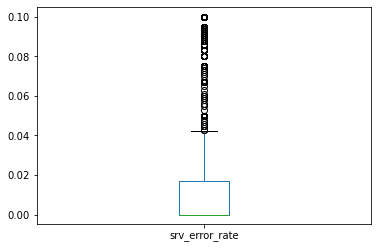

In [16]:
data.srv_error_rate.plot.box()

In [17]:
## Treating outliers : 

data.counts[data.counts>=0.22600] = 0.22600
data.diff_srv_rate[data.diff_srv_rate>=0.00700] = 0.00700
data.dst_bytes[data.dst_bytes>=0.049] = 0.049
data.dst_host_same_src_port_rate[data.dst_host_same_src_port_rate>=0.007] = 0.007
data.dst_host_serror_rate[data.dst_host_serror_rate>=0.035] = 0.035
data.dst_host_srv_serror_rate[data.dst_host_srv_serror_rate>=0.007] = 0.007
data.serror_rate[data.serror_rate>=0.037] = 0.037
data.service[data.service>=0.3] = 0.3
data.src_bytes[data.src_bytes>=0.00367] = 0.00367
data.srv_count[data.srv_count>=0.02500] = 0.02500
data.srv_error_rate[data.srv_error_rate>=0.042] = 0.042


<ipython-input-17-210dfc7c1ad8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.counts[data.counts>=0.22600] = 0.22600
C:\Users\ACER\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-17-210dfc7c1ad8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.diff_srv_rate[data.diff_srv_rate>=0.00700] = 0.00700
C:\Users\ACER\anacond

## EDA (exploratory data analysis)

## Balancing the data :  USED undersampling as data is huge and requied very high processing  time for oversampling as well as model building  :


In [18]:
data_x = data[data.columns.difference(["attack"])]

data_y = data.attack

In [19]:
rs = RandomUnderSampler(random_state=420)

x_res, y_res = rs.fit_resample(data_x, data_y)

x_res

x_new = x_res.copy()

y_new = y_res.copy()



In [20]:
## VIF : 

In [21]:
##  Remove Multicollinearity  by variance_inflation_factor : 

vif_data = pd.DataFrame()
vif_data["Features"] = x_new.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_new.values, i)
                          for i in range(len(x_new.columns))]
print(" VIF Before Feature redution : ",vif_data)

 VIF Before Feature redution :                         Features       VIF
0                        counts   8.40920
1                 diff_srv_rate  21.37129
2                     dst_bytes   2.47510
3                dst_host_count  20.55177
4   dst_host_same_src_port_rate   4.06784
5        dst_host_same_srv_rate  52.42243
6          dst_host_serror_rate 254.08289
7            dst_host_srv_count  33.48964
8   dst_host_srv_diff_host_rate   1.76849
9      dst_host_srv_serror_rate 248.64264
10                         flag  37.01298
11                    logged_in  20.38248
12                same_srv_rate  47.45866
13                  serror_rate 432.39053
14                      service   5.69738
15                    src_bytes  15.35436
16                    srv_count   3.60432
17               srv_error_rate 418.16045


In [22]:
x_new = x_new[x_new.columns.difference(["serror_rate", "dst_host_srv_serror_rate", "srv_error_rate", "dst_host_serror_rate", "same_srv_rate", "dst_host_same_srv_rate", "logged_in", "flag", "dst_host_count"])]

In [23]:
##  Remove Multicollinearity  by variance_inflation_factor : 


vif_data = pd.DataFrame()
vif_data["Features"] = x_new.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_new.values, i)
                          for i in range(len(x_new.columns))]
print(" VIF After Feature redution : ", vif_data)

 VIF After Feature redution :                        Features     VIF
0                       counts 6.48162
1                diff_srv_rate 7.50105
2                    dst_bytes 2.24483
3  dst_host_same_src_port_rate 1.93738
4           dst_host_srv_count 7.79905
5  dst_host_srv_diff_host_rate 1.46093
6                      service 5.09606
7                    src_bytes 5.45352
8                    srv_count 3.37484


In [24]:
x_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481682 entries, 0 to 481681
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   counts                       481682 non-null  float64
 1   diff_srv_rate                481682 non-null  float64
 2   dst_bytes                    481682 non-null  float64
 3   dst_host_same_src_port_rate  481682 non-null  float64
 4   dst_host_srv_count           481682 non-null  float64
 5   dst_host_srv_diff_host_rate  481682 non-null  float64
 6   service                      481682 non-null  float64
 7   src_bytes                    481682 non-null  float64
 8   srv_count                    481682 non-null  float64
dtypes: float64(9)
memory usage: 33.1 MB


## NOT consider Futher Feature reduction as already less than 15 variable are there : 

## Spilting data  by Train _ Test : 

In [25]:
train_x ,test_x, train_y , test_y =  train_test_split(x_new ,y_new , test_size=.2 , random_state=420)

## Model building
## By KNN method

In [26]:

params = {"n_neighbors":[2,3,4,5], "weights":['uniform', 'distance']}

best_params  = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params, cv=5,scoring='roc_auc',verbose=True )

best_params = best_params.fit(train_x,train_y)

best_params.best_params_


Fitting 5 folds for each of 8 candidates, totalling 40 fits


{'n_neighbors': 5, 'weights': 'uniform'}

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [28]:
knn_model = knn_model.fit(train_x,train_y)

In [29]:
train_pred = pd.Series(knn_model.predict(train_x))

test_pred = pd.Series(knn_model.predict(test_x))

In [30]:
train_accuracy = print("Train Accuracy : " , metrics.roc_auc_score(train_pred,train_y))

test_accuracy = print("Test Accuracy  : " ,metrics.roc_auc_score(test_pred,test_y))

Train Accuracy :  0.9995951692264173
Test Accuracy  :  0.9985159631642082


## 2) Multinomial Classification : 

In [31]:
data_y = data_multi.attack


In [32]:
data_x =  data_multi[x_new.columns]

In [33]:
data_y.value_counts()

0     576710
10    227228
6       5019
3       3007
8       2964
9       1554
1        968
4         53
2         30
7         10
5          8
Name: attack, dtype: int64

## Balancing the data : 

In [34]:
sm = SMOTE(random_state=420)

x_res, y_res = sm.fit_resample(data_x, data_y)

x_res

x_new = x_res.copy()

y_new = y_res.copy()

In [35]:
y_new.value_counts()

0     576710
1     576710
2     576710
3     576710
4     576710
5     576710
6     576710
7     576710
8     576710
9     576710
10    576710
Name: attack, dtype: int64

## Train-Test spilt : 

In [37]:
train_x ,test_x, train_y , test_y =  train_test_split(x_new ,y_new , test_size=.2 , random_state=420)

## Model building
## By KNN method

In [ ]:
params = {"n_neighbors":[2,3,4,5], "weights":['uniform', 'distance']}

best_params  = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params, cv=5,scoring='accuracy',verbose=True )

best_params = best_params.fit(train_x,train_y)

best_params.best_params_

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn_model = knn_model.fit(train_x,train_y)

train_pred = pd.Series(knn_model.predict(train_x))

test_pred = pd.Series(knn_model.predict(test_x))



In [ ]:
train_accuracy = print("Train Accuracy : " , metrics.roc_auc_score(train_pred,train_y))

test_accuracy = print("Test Accuracy  : " ,metrics.roc_auc_score(test_pred,test_y))